In [1]:
!pip install plotly


In [2]:
#----------------------------------------------
# Import Libraries
#----------------------------------------------

import pandas as pd
import numpy as np

import scipy.cluster.hierarchy as sch

import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [3]:
df_ba=pd.read_csv("business_data_analyst_skills.csv")
df_bma=pd.read_csv("business_management_analyst_skills.csv")

In [4]:
skill_ba=df_ba[df_ba.columns.drop(df_ba.columns[0:6])]
skill_bma=df_bma[df_bma.columns.drop(df_bma.columns[0:6])]

In [5]:
skill=pd.concat([skill_ba, skill_bma], ignore_index=True)
skill.head()

,Big Data,C/C++,CPA,CRM,Cloud,Data Mining/Analytics,DevOps,Excel,Java/Scala,MATLAB,...,business modeling,communication,consulting,data modeling,leadership,marketing,organizational,problem solving,process modeling,project_management
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
1,0,0,1,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
skill.to_csv('skill.csv')

# 1. Hierarchical Clustering

In [7]:
#in here we are constructing a distance matrix based on if  the skills appear in one row (so same posting)
#if they apear in one posting, then add the distance between them by 1. 
#Then we can minus this value by the maximum value to get the true distance between skills
N = len(skill.columns)
D = np.zeros((N,N))
for index, row in skill.iterrows():
    one = []
    for column in skill:
        if (row[column]==1):
            one.append(column)
    
    for i in one:
        for j in one:
            if i != j:
                D[skill.columns.get_loc(i),skill.columns.get_loc(j)] +=1

#in here we get the true distance as describe above                
D=D.max()-D

In [8]:
#The hierarchical clustering encoded as a linkage matrix.
Y = sch.linkage(D, method='centroid')
    

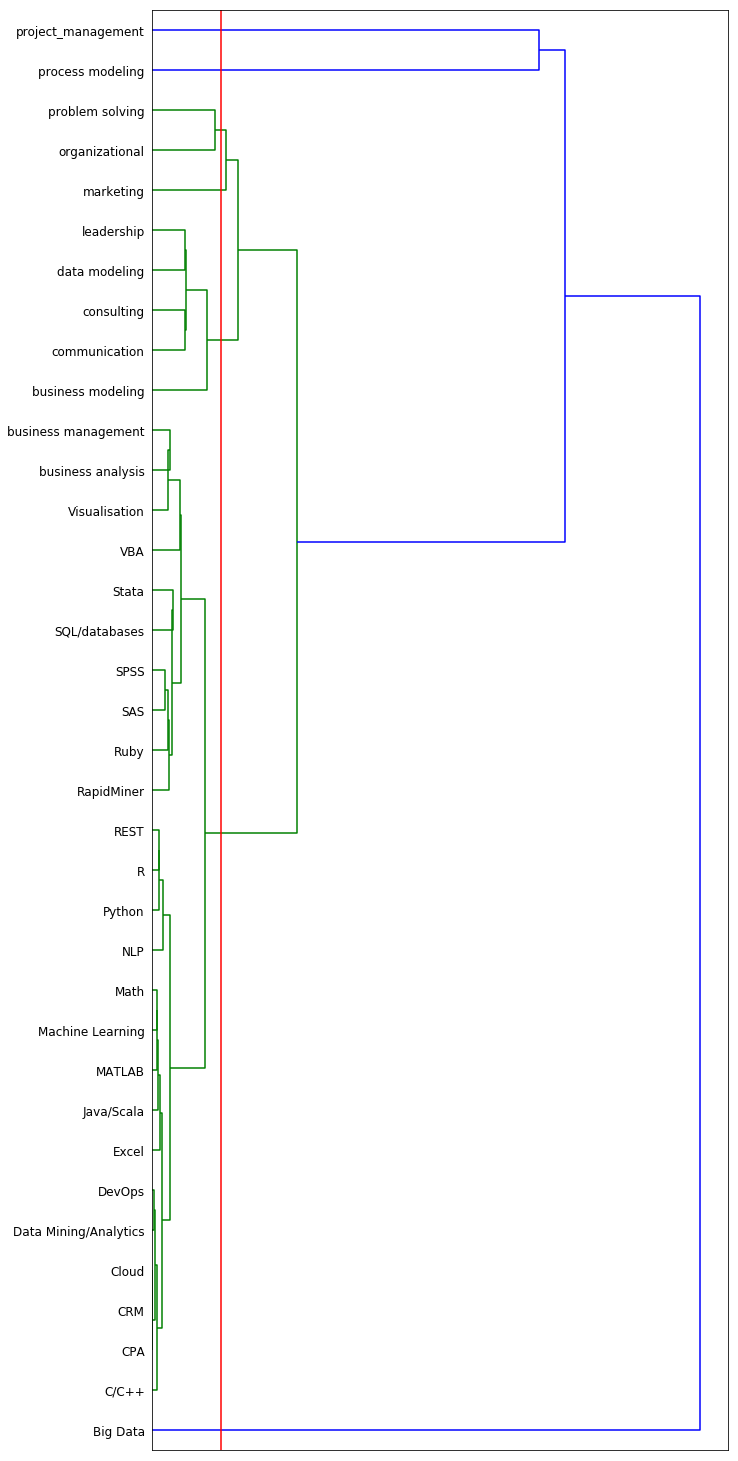

In [9]:
fig = plt.figure(figsize=(8, 20))
ax1 = fig.add_axes([0,0,1,1])

Z1 = sch.dendrogram(Y, orientation='right',show_leaf_counts=True)
labels = skill.columns
ax1.set_xticks([])
ax1.set_yticklabels(labels)
ax1.tick_params(axis='y', which='major', labelsize=12)

plt.axvline(x=230,c='r') #plot a vertical line to see the clusters it crosses
plt.plot() # supress prints
plt.savefig('figure.png',bbox_inches='tight')
plt.show()

## Now let's see how many business skills are required compare to technical skills

In [10]:
#use the frequence of the skill as the relevance value of that skill
relevance=pd.DataFrame(skill.sum().sort_values(ascending=False),columns={'Relevance'})

In [11]:
#drop any rows with 0 values
relevance=relevance.loc[~(relevance==0).all(axis=1)]

In [12]:
#from plotly.offline import init_notebook_mode, iplot
import plotly 
plotly.tools.set_credentials_file(username='wuwenjia24', api_key='sjTYj1PUCt8kbzm1eKHy')
import plotly.plotly as py
import plotly.graph_objs as go
labels = (np.array(relevance.index))
sizes = (np.array((relevance)))

trace = go.Pie(labels=labels, values=sizes, hole=0.6)
layout = go.Layout(
    title='Most Needed Skills'
)
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename="top-skil")

C:\Users\Ween\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### We only need to look into the bussiness management aspect of the program as we have the technical part covered in Part 2. 

In [13]:
#get the list of percentages
relevance/relevance.sum()

,Relevance
SQL/databases,0.195538
communication,0.148698
Excel,0.125219
Data Mining/Analytics,0.061909
R,0.056535
organizational,0.050812
problem solving,0.042051
business analysis,0.037145
leadership,0.034459
project_management,0.030721


### For the top skills (visiable on the plot), the business and management skills are organizational, communication, business analysis, leadership, project_management, marketing, CRM and consulting. Their total percentage is 37.11%. But communication should be weighted down a bit as it takes the third place in 'Data Science' search as well(refer to the appendix below) and hence, it is not a very important differentiation factor, even though it is very important in both positions. So  combining this percentage with technical courses we found in Part 2 and Hierarchical Clustering above, we have:
   
*Required Course:

-------------------------------Business------------------------------------------
- Evidence-Based Practice in Management(communication,consulting,data modeling,leadership, business modeling) 17.35%
- Organizational Behaviour (problem solving, organizational) 9.29%

-------------------------------Data Science---------------------------------------
- Data, Models and Decisions in Business Analytics (SQL, business analysis, business management, visualization) 23.92%
- Introduction to R for Data Science and Data Mining(R, Machine Learning,Data Mining/Analytics) 13.63%
- Introduction to Business Data Management (Excel, VBA) 12.63%

*Optional Course:

-------------------------------Business-----------------------------------------
- Introduction to Excel for Accounting (Excel, CPA) 12.58% (the class is optional because it has very specific area and narrow path ahead)
- Demand and Supply Analytics(business analysis, business management, visualization) 4.37%
- Marketing Analytics (Marketing) 2.94%
- Project Management in Data Science (Project Management) 3.07%

-------------------------------Data Science---------------------------------------
- Introduction to Python for Data Science(Python, Machine Learning,Data Mining/Analytics) 9.82%
- Data Science in Customer Relationship management (CRM, Cloud, Data Mining/Analytics) 9.50%
- Introduction to big data analytics tool (Big Data, Cloud) 2.14%

*Projects:
- Big Data Marketing (combining knowledge from Marketing Analytics & Data, Models and Decisions in Business Analytics)
- Practice Database Management (combining knowledge from Evidence-Based Practice in Management & Introduction to Excel for Databas)

*Internship:
- using the results from part 2, we recomend Ontario Power Generation for Business Analyst and Marketing Analyst internship

## Appendix

In [14]:
df=pd.read_csv('data_science_skills.csv')
df=df[df.columns.drop(df.columns[0:6])]
df=pd.DataFrame(df.sum().sort_values(ascending=False),columns={'counts'})
labels = (np.array(df.index))
sizes = (np.array((df)))

trace = go.Pie(labels=labels, values=sizes, hole=0.6)
layout = go.Layout(
    title='Data Science Skills'
)
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename="top_skil_data_science")